# Associative Memory

This tutorial introduces the Associative Memory (AM) module in the SPA.

An associative memory is a neural network used to store patterns.
When the input of the network is presented with a partial or noisy pattern, it can recover the same pattern or recall another stored pattern. 
If the recovered pattern is the same as the input pattern, the memory is said to be autoassociative, otherwise if the recovered pattern is different the network is heteroassociative. 
For more information on properties and capacities of associative memories see X, Y and Z.

The patterns stored by the AM module in the SPA are semantic pointers, organised in a SPA vocabulary.
The examples in this tutorial demonstrate how to use the AM module, store and recall the patterns.
Advanced functionality of the module such as the recall of multiple memories are also presented.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo import spa
%load_ext nengo.ipynb

## Step 1: Creating an Associative Memory

We start by creating a set of patterns the AM will store. 
The vocabulary in this example will contain five words: ORANGE, APRICOT, CHERRY, STRAWBERRY and APPLE.
Each word is represented as semantic pointer, which is a $n$-dimensional vector.
When creating a vocabulary, we specify the number of dimensions for all semantic pointers.

In [19]:
vocab = spa.Vocabulary(dimensions=16)

words = ['ORANGE', 'APRICOT', 'CHERRY', 'STRAWBERRY', 'APPLE']

for word in words:
    vocab.parse(word)

Next, we create an autoassociative memory. The memory is created within a `nengo.Network` module, and it expects the input vocabulary:

In [40]:
with nengo.Network('model') as model:
    assoc_mem = spa.AssociativeMemory(input_vocab=vocab)

After the network has been created, we test its functionality.
The simulation consists of presenting a semantic pointer at the input, and inspect the output of the network to see if it matches with the input.
To achieve this, we need to introduce two additional objects: `nengo.Node` which feeds the input to the AM, and `nengo.Probe` to read out pattern that is being fed in the network and the pattern at the network output throughout the simulation.

In [61]:
with model:
    input_node = nengo.Node(output=vocab['APPLE'].v, label='input')
    nengo.Connection(input_node, assoc_mem.input)

    input_probe = nengo.Probe(input_node)
    output_probe = nengo.Probe(assoc_mem.output, synapse=0.03)

We run the simulation for the 0.2 simulation time:

In [64]:
sim = nengo.Simulator(model)
sim.run(0.2)
t = sim.trange()
print('Number of simulation steps: %d' % len(t))

Number of simulation steps: 200


The inputs and the outputs of the AM during the simulation can be obtained from the `sim.data` object:

In [68]:
input_net = sim.data[input_probe]
output_net = sim.data[output_probe]
print("Dimensions of the input: (%d, %d)" % input_net.shape)
print("Dimensions of the output: (%d, %d)" % output_net.shape)

Dimensions of the input: (200, 16)
Dimensions of the output: (200, 16)


We see that for each simulation step (rows of the `input_net` and the `output_net` arrays) there is a 16-dimensional pattern. We compare these input and output patterns at all time steps to all the patterns in the vocabulary using a dot product over vectors, and plot the similarity:

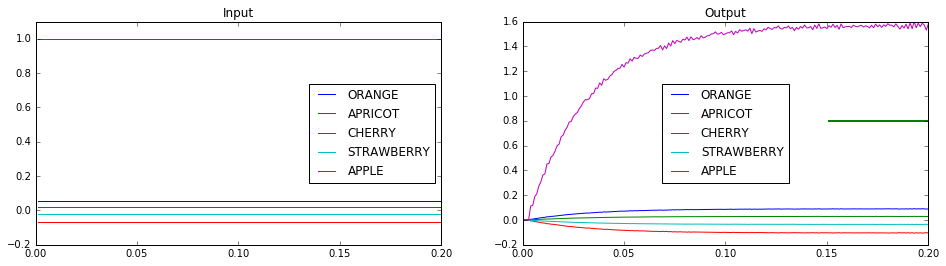

In [73]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(t, nengo.spa.similarity(input_net, vocab))
plt.title("Input")
plt.ylim(top=1.1)
plt.legend(vocab.keys, loc='best')
plt.subplot(1, 2, 2)
plt.plot(t, nengo.spa.similarity(output_net, vocab))
plt.plot(t[t > 0.15], np.ones(t.shape)[t > 0.15] * 0.8, c='g', lw=2)
plt.title("Output")
plt.legend(vocab.keys, loc='best')
